In [ ]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import transforms, datasets
import torch.optim as optim
from torch.autograd import Variable
import torchvision

import matplotlib.pyplot as plt
import time

In [ ]:
# apply_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
apply_transform = transforms.Compose([transforms.ToTensor()])
BatchSize = 256
BatchSize2 = 1024

trainset = datasets.MNIST(root='./MNIST'
                           ,train = True
                          , download = True
                         , transform = apply_transform)
trainLoader = torch.utils.data.DataLoader(
    trainset,
    batch_size = BatchSize,
    shuffle=True,
    num_workers=4
)

testset = datasets.MNIST(root='./MNIST'
                           ,train = False
                          , download = True
                         , transform = apply_transform)
testLoader = torch.utils.data.DataLoader(
    testset,
    batch_size = BatchSize,
    shuffle=True,
    num_workers=4
)

trainset2 = datasets.MNIST(root='./MNIST'
                           ,train = True
                          , download = True
                         , transform = apply_transform)
trainLoader2 = torch.utils.data.DataLoader(
    trainset2,
    batch_size = BatchSize2,
    shuffle=True,
    num_workers=4
)

testset2 = datasets.MNIST(root='./MNIST'
                           ,train = False
                          , download = True
                         , transform = apply_transform)
testLoader2 = torch.utils.data.DataLoader(
    testset2,
    batch_size = BatchSize2,
    shuffle=True,
    num_workers=4
)

In [ ]:
# Size of train and test datasets
print('No. of samples in train set:' + str(len(trainLoader.dataset)))
print('No. of samples in test set:' + str(len(testLoader.dataset)))

# Size of train and test datasets
print('No. of samples in train set:' + str(len(trainLoader2.dataset)))
print('No. of samples in test set:' + str(len(testLoader2.dataset)))

No. of samples in train set:60000
No. of samples in test set:10000
No. of samples in train set:60000
No. of samples in test set:10000


In [ ]:
class FFNN(nn.Module): #nn.Module --> Base class for all Neural Network modules
  def __init__(self):
    super(FFNN, self).__init__()
    
    self.fc1 = nn.Linear(784, 100)
    self.fc2 = nn.Linear(100, 10)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.sigmoid(x)
    x = self.fc2(x)
    x = F.softmax(x, dim=1)
    return x

In [ ]:
# use_gpu = torch.cuda.is_available()
# net1 = FFNN()
# net2 = FFNN()
# net3 = FFNN()
# net4 = FFNN()

# if use_gpu:
#   print('GPU is available!')
#   net1 = net1.cuda()
#   net2 = net2.cuda()
#   net3 = net3.cuda()
#   net4 = net4.cuda()

GPU is available!


##Q1
Using batchsize 256 and 1024

In [ ]:
criterion = nn.CrossEntropyLoss()
learning_rate1 = 0.1
optimizer1 = optim.SGD(net1.parameters(), lr = learning_rate1, momentum=0.9)
num_epochs = 25
use_gpu = torch.cuda.is_available()
net1 = FFNN()

if use_gpu:
  print('GPU is available!')
  net1 = net1.cuda()
train_loss = []
train_acc = []
for epoch in range(num_epochs):
  running_loss = 0.0
  running_corr = 0
  for i, data in enumerate(trainLoader):
    inputs, labels = data
    if use_gpu:
      inputs, labels = inputs.cuda(), labels.cuda()
      # Initializing model gradients to zero
      optimizer1.zero_grad()
      # Data feed-forward through the network
      tempin = inputs.view(inputs.shape[0], -1)
      # tempin1 = inputs.reshape(inputs.shape[0], -1)
      outputs1 = net1(tempin)
      preds1 = torch.argmax(outputs1, dim=1)
      # Finding the loss
      loss = criterion(outputs1, labels)
      # Accumulating the loss for each batch
      running_loss+=loss
      # Accumulating the number of correct predictions
      running_corr += torch.sum(preds1 == labels)

  totalLoss1 = running_loss/(i+1)
  # Calculating gradients
  totalLoss1.backward()
  #Updating model parameters
  optimizer1.step()

  epoch_loss = running_loss.item()/(i+1) # Total loss for one epoch
  epoch_acc = running_corr.item()/60000

  train_loss.append(epoch_loss) # Saving the loss over epochs for plotting the graph
  train_acc.append(epoch_acc)

  print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training accuracy: {:.4f}'.format(epoch+1, 50, epoch_loss, epoch_acc))

GPU is available!
Epoch 1/50 : Training loss: 2.3034 | Training accuracy: 0.0993
Epoch 2/50 : Training loss: 2.3034 | Training accuracy: 0.0993
Epoch 3/50 : Training loss: 2.3034 | Training accuracy: 0.0993
Epoch 4/50 : Training loss: 2.3035 | Training accuracy: 0.0993
Epoch 5/50 : Training loss: 2.3035 | Training accuracy: 0.0993
Epoch 6/50 : Training loss: 2.3035 | Training accuracy: 0.0993
Epoch 7/50 : Training loss: 2.3034 | Training accuracy: 0.0993
Epoch 8/50 : Training loss: 2.3035 | Training accuracy: 0.0993
Epoch 9/50 : Training loss: 2.3034 | Training accuracy: 0.0993
Epoch 10/50 : Training loss: 2.3035 | Training accuracy: 0.0993
Epoch 11/50 : Training loss: 2.3034 | Training accuracy: 0.0993
Epoch 12/50 : Training loss: 2.3034 | Training accuracy: 0.0993
Epoch 13/50 : Training loss: 2.3035 | Training accuracy: 0.0993
Epoch 14/50 : Training loss: 2.3034 | Training accuracy: 0.0993
Epoch 15/50 : Training loss: 2.3035 | Training accuracy: 0.0993
Epoch 16/50 : Training loss: 2.

In [ ]:
correct_pred1 = 0
loss_pred1 = 0
for data in testLoader:
  inputs, labels = data
  if use_gpu:
    inputs, labels = inputs.cuda(), labels.cuda()
  output1 = net1(inputs.view(inputs.shape[0], -1))
  preds1 = torch.argmax(output1, dim=1)
  correct_pred1 += torch.sum(preds1 == labels)
  loss_pred1 = criterion(output1, labels)

test_accuracy = correct_pred1.item()/10000.0

print('Testing accuracy (Batch size=256, lr=0.1) = ', test_accuracy* 100)
print('Loss ' + str(loss_pred1))

Testing accuracy (Batch size=256, lr=0.1) =  10.32
Loss tensor(2.3130, device='cuda:0', grad_fn=<NllLossBackward>)


In [ ]:
criterion = nn.CrossEntropyLoss()
learning_rate2 = 0.1
optimizer2 = optim.SGD(net2.parameters(), lr = learning_rate2, momentum=0.9)
num_epoch2 = 25
use_gpu = torch.cuda.is_available()
net2 = FFNN()

if use_gpu:
  print('GPU is available!')
  net2 = net2.cuda()
train_loss2 = []
train_acc2 = []
for epoch in range(num_epoch2):
  running_loss = 0.0
  running_corr = 0

  for i, data in enumerate(trainLoader2):
    inputs, labels = data
    if use_gpu:
      inputs, labels = inputs.cuda(), labels.cuda()
      # Initializing model gradients to zero
      optimizer2.zero_grad()
      # Data feed-forward through the network
      outputs2 = net2(inputs.view(inputs.shape[0], -1)) 
      preds2 = torch.argmax(outputs2, dim=1)
      # Finding the loss
      loss = criterion(outputs2, labels)
      # Accumulating the loss for each batch
      running_loss+=loss
      # Accumulating the number of correct predictions
      running_corr += torch.sum(preds2 == labels)
  
  
  totalLoss2 = running_loss/(i+1)
  # Calculating gradients
  totalLoss2.backward()
  #Updating model parameters
  optimizer2.step()

  epoch_loss = running_loss.item()/(i+1) # Total loss for one epoch
  epoch_acc = running_corr.item()/60000

  train_loss2.append(epoch_loss) # Saving the loss over epochs for plotting the graph
  train_acc2.append(epoch_acc)

  print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training accuracy: {:.4f}'.format(epoch+1, 50, epoch_loss, epoch_acc))

GPU is available!
Epoch 1/50 : Training loss: 2.3024 | Training accuracy: 0.0584
Epoch 2/50 : Training loss: 2.3024 | Training accuracy: 0.0584
Epoch 3/50 : Training loss: 2.3024 | Training accuracy: 0.0584
Epoch 4/50 : Training loss: 2.3024 | Training accuracy: 0.0584
Epoch 5/50 : Training loss: 2.3024 | Training accuracy: 0.0584
Epoch 6/50 : Training loss: 2.3024 | Training accuracy: 0.0584
Epoch 7/50 : Training loss: 2.3024 | Training accuracy: 0.0584
Epoch 8/50 : Training loss: 2.3024 | Training accuracy: 0.0584
Epoch 9/50 : Training loss: 2.3024 | Training accuracy: 0.0584
Epoch 10/50 : Training loss: 2.3024 | Training accuracy: 0.0584
Epoch 11/50 : Training loss: 2.3024 | Training accuracy: 0.0584
Epoch 12/50 : Training loss: 2.3024 | Training accuracy: 0.0584
Epoch 13/50 : Training loss: 2.3024 | Training accuracy: 0.0584
Epoch 14/50 : Training loss: 2.3024 | Training accuracy: 0.0584
Epoch 15/50 : Training loss: 2.3024 | Training accuracy: 0.0584
Epoch 16/50 : Training loss: 2.

In [ ]:
correct_pred2 = 0
loss_pred2 = 0
for data in testLoader2:
  input, labels = data
  if use_gpu:
    inputs, labels = input.cuda(), labels.cuda()
  output = net2(inputs.view(inputs.shape[0], -1))
  preds2 = torch.argmax(output, dim=1)
  correct_pred2 += torch.sum(preds2 == labels)
  loss_pred2 += criterion(output, labels)

test_accuracy2 = correct_pred2.item()/10000.0
print('Testing accuracy (Batch size=1024, lr=0.1) = ', test_accuracy2* 100)
print('Loss ' + str(loss_pred2))

Testing accuracy (Batch size=1024, lr=0.1) =  5.609999999999999
Loss tensor(23.0244, device='cuda:0', grad_fn=<AddBackward0>)


Text(0, 0.5, 'Training Accuracy')

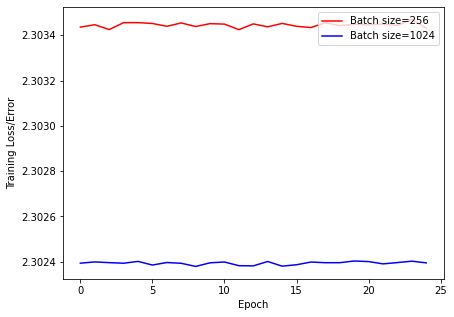

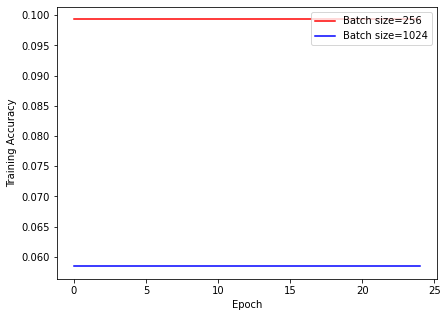

In [ ]:
fig = plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(range(num_epochs), train_loss, 'r-', label='Batch size=256')
plt.plot(range(num_epoch2), train_loss2, 'r-', color='blue', label='Batch size=1024')

plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Training Loss/Error')

fig = plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(range(num_epochs), train_acc, 'r-', label='Batch size=256')
plt.plot(range(num_epoch2), train_acc2, 'r-', color='blue', label='Batch size=1024')

plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')

##Q2
lr -> 0.025, 0.05, 0.1, 0.2, 0.5

In [ ]:
lr_arr = [0.025, 0.05, 0.1, 0.2, 0.5]

In [ ]:
use_gpu = torch.cuda.is_available()
net3 = FFNN()
testacc = []
for learning_rate1 in lr_arr:
  print("Doing for learning_rate " + str(learning_rate1) )
  if use_gpu:
    net3 = net3.cuda()
  criterion = nn.CrossEntropyLoss()
  # learning_rate1 = 0.1
  optimizer3 = optim.SGD(net3.parameters(), lr = learning_rate1, momentum=0.9)
  num_epochs = 10

  train_loss = []
  train_acc = []
  for epoch in range(num_epochs):
    running_loss = 0.0
    running_corr = 0
    for i, data in enumerate(trainLoader):
      inputs, labels = data
      if use_gpu:
        inputs, labels = inputs.cuda(), labels.cuda()
        # Initializing model gradients to zero
        optimizer3.zero_grad()
        # Data feed-forward through the network
        outputs3 = net3(inputs.view(inputs.shape[0], -1))
        preds3 = torch.argmax(outputs3, dim=1)
        # Finding the loss
        loss = criterion(outputs3, labels)
        # Accumulating the loss for each batch
        running_loss+=loss
        # Accumulating the number of correct predictions
        running_corr += torch.sum(preds3 == labels)

    totalLoss3 = running_loss/(i+1)
    # Calculating gradients
    totalLoss3.backward()
    #Updating model parameters
    optimizer3.step()

    epoch_loss = running_loss.item()/(i+1) # Total loss for one epoch
    epoch_acc = running_corr.item()/60000

    train_loss.append(epoch_loss) # Saving the loss over epochs for plotting the graph
    train_acc.append(epoch_acc)

    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training accuracy: {:.4f}'.format(epoch+1, 50, epoch_loss, epoch_acc))


  correct_pred2 = 0
  loss_pred2 = 0
  for data in testLoader:
    input, labels = data
    if use_gpu:
      inputs, labels = input.cuda(), labels.cuda()
    output = net3(inputs.view(inputs.shape[0], -1))
    preds2 = torch.argmax(output, dim=1)
    loss = criterion(output, labels)
    loss_pred2 += loss
    correct_pred2 += torch.sum(preds2 == labels)

  test_accuracy2 = correct_pred2.item()/10000.0
  testacc.append(test_accuracy2)
  print('Testing accuracy (Batch size=256, lr=' + str(learning_rate1) + ') = ', test_accuracy2* 100)
  print('Loss ' + str(loss_pred2))

Doing for learning_rate 0.025
Epoch 1/50 : Training loss: 2.3031 | Training accuracy: 0.1020
Epoch 2/50 : Training loss: 2.3031 | Training accuracy: 0.1020
Epoch 3/50 : Training loss: 2.3031 | Training accuracy: 0.1021
Epoch 4/50 : Training loss: 2.3030 | Training accuracy: 0.1021
Epoch 5/50 : Training loss: 2.3030 | Training accuracy: 0.1021
Epoch 6/50 : Training loss: 2.3030 | Training accuracy: 0.1021
Epoch 7/50 : Training loss: 2.3029 | Training accuracy: 0.1022
Epoch 8/50 : Training loss: 2.3029 | Training accuracy: 0.1022
Epoch 9/50 : Training loss: 2.3028 | Training accuracy: 0.1022
Epoch 10/50 : Training loss: 2.3028 | Training accuracy: 0.1022
Testing accuracy (Batch size=256, lr=0.025) =  10.100000000000001
Loss tensor(92.1053, device='cuda:0', grad_fn=<AddBackward0>)
Doing for learning_rate 0.05
Epoch 1/50 : Training loss: 2.3027 | Training accuracy: 0.1022
Epoch 2/50 : Training loss: 2.3027 | Training accuracy: 0.1022
Epoch 3/50 : Training loss: 2.3027 | Training accuracy: 

Text(0, 0.5, 'Test Accuracy')

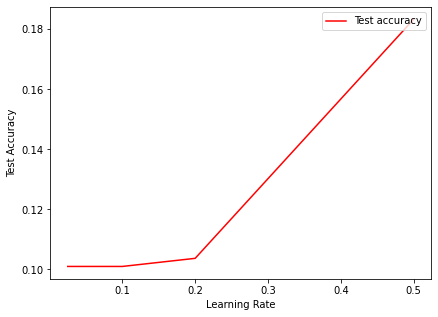

In [ ]:
fig = plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(lr_arr, testacc, 'r-', label='Test accuracy')

plt.legend(loc='upper right')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')

Best Test Accuracy is at 0.5

##Q3

In [ ]:
criterion = nn.CrossEntropyLoss()
use_gpu = torch.cuda.is_available()
net4 = FFNN()

if use_gpu:
  print('GPU is available!')
  net4 = net4.cuda()
learning_rate1 = 0.3
optimizer1 = optim.SGD(net4.parameters(), lr = learning_rate1, momentum=0.9)
num_epochs = 50
train_loss = []
train_acc = []
for epoch in range(num_epochs):
  running_loss = 0.0
  running_corr = 0
  if  (epoch%5==0):
    learning_rate1 += 0.005*(epoch/4)
    optimizer1 = optim.SGD(net4.parameters(), lr = learning_rate1, momentum=0.9)
    print("LEARNING RATE: " + str(learning_rate1))
  for i, data in enumerate(trainLoader):
    inputs, labels = data
    if use_gpu:
      inputs, labels = inputs.cuda(), labels.cuda()
      # Initializing model gradients to zero
      optimizer1.zero_grad()
      # Data feed-forward through the network
      outputs1 = net4(inputs.view(inputs.shape[0], -1))
      preds1 = torch.argmax(outputs1, dim=1)
      # Finding the loss
      loss = criterion(outputs1, labels)
      # Accumulating the loss for each batch
      running_loss+=loss
      # Accumulating the number of correct predictions
      running_corr += torch.sum(preds1 == labels)

  totalLoss1 = running_loss/(i+1)
  # Calculating gradients
  totalLoss1.backward()
  #Updating model parameters
  optimizer1.step()

  epoch_loss = running_loss.item()/(i+1) # Total loss for one epoch
  epoch_acc = running_corr.item()/60000

  train_loss.append(epoch_loss) # Saving the loss over epochs for plotting the graph
  train_acc.append(epoch_acc)

  print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training accuracy: {:.4f}'.format(epoch+1, 50, epoch_loss, epoch_acc))

GPU is available!
LEARNING RATE: 0.3
Epoch 1/50 : Training loss: 2.3030 | Training accuracy: 0.0808
Epoch 2/50 : Training loss: 2.3029 | Training accuracy: 0.0858
Epoch 3/50 : Training loss: 2.3027 | Training accuracy: 0.0931
Epoch 4/50 : Training loss: 2.3025 | Training accuracy: 0.1013
Epoch 5/50 : Training loss: 2.3021 | Training accuracy: 0.1065
LEARNING RATE: 0.30624999999999997
Epoch 6/50 : Training loss: 2.3017 | Training accuracy: 0.1056
Epoch 7/50 : Training loss: 2.3016 | Training accuracy: 0.1051
Epoch 8/50 : Training loss: 2.3014 | Training accuracy: 0.1043
Epoch 9/50 : Training loss: 2.3012 | Training accuracy: 0.1033
Epoch 10/50 : Training loss: 2.3008 | Training accuracy: 0.1028
LEARNING RATE: 0.31875
Epoch 11/50 : Training loss: 2.3004 | Training accuracy: 0.1024
Epoch 12/50 : Training loss: 2.3003 | Training accuracy: 0.1023
Epoch 13/50 : Training loss: 2.3001 | Training accuracy: 0.1027
Epoch 14/50 : Training loss: 2.2998 | Training accuracy: 0.1427
Epoch 15/50 : Trai

Text(0, 0.5, 'Training Accuracy')

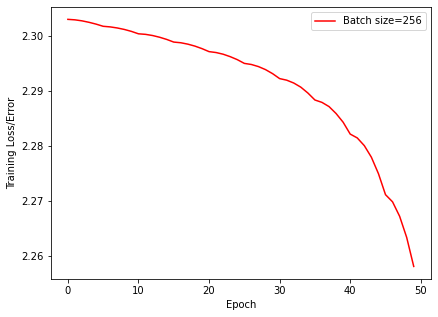

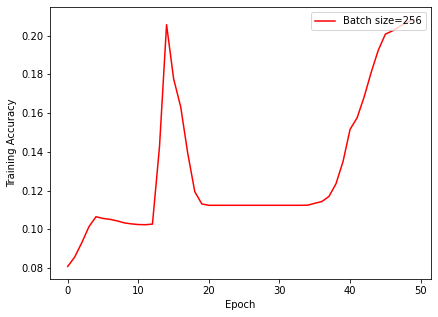

In [ ]:
fig = plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(range(num_epochs), train_loss, 'r-', label='Batch size=256')

plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Training Loss/Error')

fig = plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(range(num_epochs), train_acc, 'r-', label='Batch size=256')

plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')

I have increased the learning rate from 0.3 to 0.58126 and have saw that the accuracy increased as learning rate increased from 0.5